# EQUITY VANILLA OPTION USING MONTE CARLO

Valuation and Risk of a simple Vanilla Equity Option

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.products.equity import *

###################################################################
#   WELCOME TO FINANCEPY BETA VERSION 0.171 UNDER DEVELOPMENT    #
# FinancePy it is distributed FREE & WITHOUT ANY WARRANTY AND     #
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. For more   #
# details see the repo at https://github.com/domokane/FinancePy   #
###################################################################



# Define the Call and Put Options

In [3]:
valueDate = FinDate(1, 1, 2015)

In [4]:
expiryDate = valueDate.addYears(0.5)

In [5]:
expiryDate

WED 1 JUL 2015

In [12]:
strikePrice = 50.0

In [13]:
callOption = FinEquityVanillaOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_CALL)

In [8]:
stockPrice = 50
volatility = 0.20
interestRate = 0.05
dividendYield = 0.0

In [9]:
discountCurve = FinDiscountCurveFlat(valueDate, interestRate)

In [10]:
model = FinEquityModelBlackScholes(volatility)

In [11]:
v_exact = callOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)
print(v_exact)

3.4263259753181217


In [27]:
seed = 141

In [36]:
v_mc = []
v_exacts = []

numPaths = range(10000,1000000,10000)
for numPath in numPaths:
    v = callOption.valueMC(valueDate, stockPrice, discountCurve, dividendYield, model, numPath, seed)
    v_mc.append(v)
    v_exacts.append(v_exact)

Text(0, 0.5, 'Option Price')

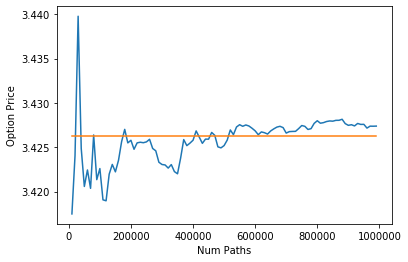

In [37]:
plt.plot(numPaths, v_mc)
plt.plot(numPaths, v_exacts)

plt.xlabel("Num Paths")
plt.ylabel("Option Price")

## Using Sobol Quasi-Random Numbers

In [38]:
v_mc = []
v_exacts = []

numPaths = range(100000,1000000,10000)
for numPath in numPaths:
    v = callOption.valueMC(valueDate, stockPrice, discountCurve, dividendYield, model, numPath, seed, True)
    v_mc.append(v)
    v_exacts.append(v_exact)

Text(0, 0.5, 'Option Price')

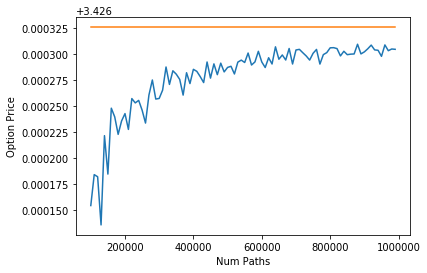

In [39]:
plt.plot(numPaths, v_mc)
plt.plot(numPaths, v_exacts)

plt.xlabel("Num Paths")
plt.ylabel("Option Price")

The convergence is impressive !

Copyright (c) 2020 Dominic O'Kane